<br>
# Assignment 4: PCA & Anomaly Detection
<br>

**Team:**
- Kevin Huber
- Markus Kaufmann
- Luca Rava
<br>

## Exercise 3 - Principal Component Analysis

### 3.1. PCA for Data Inspection and Redundancy Analysis

In [73]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from sklearn import tree
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [74]:
data = pd.read_csv(r'parking-data.csv')
data.columns
data.head()

,openstate,timestamp,vacant,taken,capacity
0,offen,2017-12-20 10:30:00,125,258,383
1,offen,2017-12-20 10:31:00,125,258,383
2,offen,2017-12-20 10:32:01,124,259,383
3,offen,2017-12-20 10:33:01,123,260,383
4,offen,2017-12-20 10:34:01,126,257,383


In [75]:
data['year'] = pd.DatetimeIndex(data['timestamp']).year
data['month'] = pd.DatetimeIndex(data['timestamp']).month
data['day'] = pd.DatetimeIndex(data['timestamp']).day
data['hour'] = pd.DatetimeIndex(data['timestamp']).hour
data['minute'] = pd.DatetimeIndex(data['timestamp']).minute
data = data.drop(columns='timestamp')

## Data Cleaning

In [76]:
data = data.drop(columns='openstate')

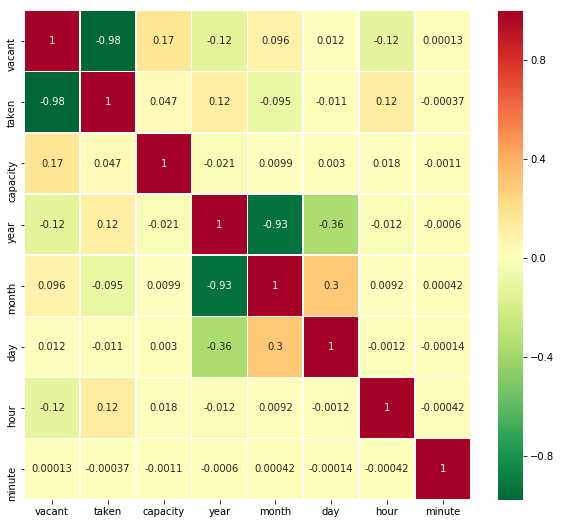

In [77]:
plt.subplots(figsize=(10, 9))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.5)
plt.show()

In [78]:
data = data.drop(data[(data.taken == 0) & (data.vacant == 0)].index)

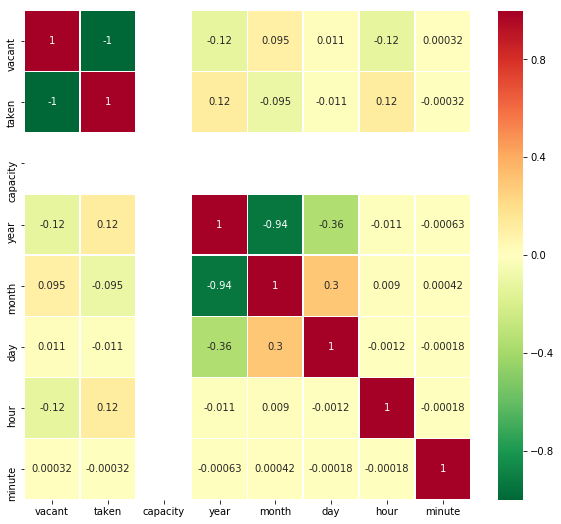

In [79]:
plt.subplots(figsize=(10, 9))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.5)
plt.show()

In [80]:
data = StandardScaler().fit_transform(data)

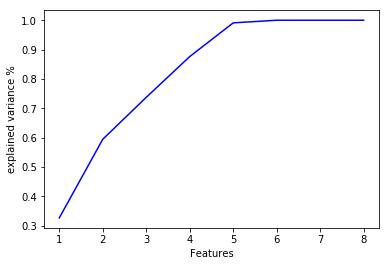

In [81]:
scores = []

for i in range(1,data.shape[1]+1):
    scores.append(sum(PCA(i).fit(data).explained_variance_ratio_))

plt.plot(list(range(1,data.shape[1]+1)), scores, color='blue')
plt.ylabel('explained variance %')
plt.xlabel('Features')
plt.show()

### 3.2. PCA for Visualization

In [101]:
# Load File Autoscout 24
dforig = pd.read_csv(r"AutoScout24 Dataset.csv")
print(dforig.columns)
print(dforig.head())
print(dforig.shape[0])

Index(['Name', 'Price', 'Mileage', 'Registration', 'Color', 'Doors',
       'Horsepower', 'EngineSize', 'Seats', 'Cylinders', 'Gears', 'Year'],
      dtype='object')
                       Name   Price  Mileage Registration      Color  Doors  \
0      MERCEDES-BENZ SL 500   44800    27600   1996-10-01  anthrazit      2   
1                 BMW 740iL   22800    18300   1999-05-01  anthrazit      4   
2  AUDI A8 4.2 FSI quattro   183710      650   2008-08-01  anthrazit      5   
3    OPEL Zafira 2.2i Cosmo   19900    32000   2006-02-01  anthrazit      5   
4        VOLVO V70 D5 AWD A   18999   118000   2003-02-01  anthrazit      5   

   Horsepower  EngineSize  Seats  Cylinders  Gears  Year  
0         320        4973      2          8      5  1996  
1         286        4398      5          8      5  1999  
2         350        4172      5          8      6  2008  
3         150        2198      7          4      6  2006  
4         163        2401      5          5      5  2003  
55208

In [103]:
# reduced to the numeric attributes
df = dforig[dforig.columns.drop(list(dforig.filter(regex='Name|Color|Registration|Doors')))]

# Separate target and features
X = df.drop('Price', axis=1)
y = df.Price

In [104]:
# Z-score normalization
X = StandardScaler().fit_transform(X)

In [106]:
# Reduce to 2D
pca = PCA(2).fit_transform(X)

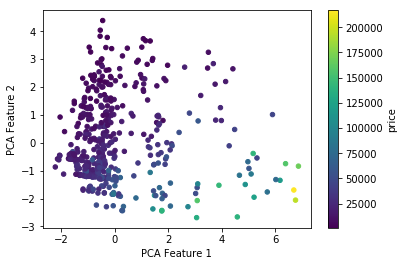

In [110]:
import matplotlib.cm as cm
import matplotlib.colors as colors

data_plot = pd.DataFrame()
data_plot['feature1'] = pca[:,0]
data_plot['feature2'] = pca[:,1]
data_plot['price'] = y

data_plot = data_plot.sample(n=500)

fig, ax = plt.subplots()
data_plot.plot.scatter(x='feature1', y='feature2', c='price', colormap='viridis', ax=ax)

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

<br>
## Exercise 4 - Anomaly Detection

In [69]:
# Load File creditcard.csv
df_cc = pd.read_csv(r"creditcard.csv")
print(df_cc.columns)
print(df_cc.head())
print(df_cc.shape[0])

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.

<br>
**_Remove the time feature. It is ill-designed and just makes your life complicated (by generating a
singular covariance matrix)_**
<br>

In [70]:
# Remove feature "Time"
df_cc = df_cc.drop(['Time'], axis=1)

<br>
**_Observe the extreme class imbalance, which obviously is typical for anomaly detection. Create a
test set that consists of all fraudulent transactions and, randomly drawn, the same number of
normal transactions. Take the remaining normal transactions as training set._**
<br>

In [71]:
# Split data by class feature
df_class_0 = df_cc[df_cc['Class'] == 0]
df_class_1 = df_cc[df_cc['Class'] == 1]

print("Class 0: %d" % df_class_0.shape[0])
print("Class 1: %d" % df_class_1.shape[0])

# Sample set with normal transactions, equivalent size to the fraudulent ones
df_class_0_sample = df_class_0.sample(n=df_class_1.shape[0])
train_data = df_class_0.drop(df_class_0_sample.index)
print("Train data: %d" % train_data.shape[0])

# Compose test set
test_data = pd.DataFrame(data=df_class_1)
test_data = test_data.append(df_class_0_sample)
print("Test Data: %d" % test_data.shape[0])

Class 0: 284315
Class 1: 492
Train data: 283823
Test Data: 984


<br>
***Determine mean vector (mean) and covariance matrix (cov) from the training set and fit a multivariate
Gaussian distribution. Instead of programming all the formulas yourself, you may want to
use Python’s built-in function (scipy.stats.multivariate\_normal) for fitting a multivariate
Gaussian distribution from (sort-of independent) single features:***
<br>

<br>
**_Implement a method that helps you choose a good threshold value._**
<br>

In [81]:
def determine_threshold(densities, data):
    best_threshold = 0
    best_score = 0
    score = 0
    stepsize = (max(densities) - min(densities)) / 1000;
    thresholds = np.arange(min(densities), max(densities), stepsize)
    for threshold in np.nditer(thresholds):
        predictions = (densities < threshold)
        score = accuracy_score(data['Class'], predictions)
        if score > best_score:
            best_score = score
            best_threshold = threshold
    return best_threshold

In [86]:
# Determine mean / cov from the training set
mean = train_data.mean()
cov = train_data.cov()

# Fit multivariate Gaussian distribution
p = st.multivariate_normal(mean, cov, allow_singular=True)
densities = p.pdf(test_data)
threshold = determine_threshold(densities, test_data)
predictions = (densities < threshold)
accuracy_score(test_data['Class'], predictions)

0.7815040650406504